# Analyzing exam scores
## 📖 Background
In a large school, the school makes every student take year-end math, reading, and writing exams. The principal of the school wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The dataset has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

In [19]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
df = pd.read_csv('data/exams.csv')
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


A column  titled **average_score** is added to the dataset. This will be used in ralation to other categorical variables in the dataset.

In [21]:
df['average_score'] =(df['math'] + df['writing'] + df['reading']) / 3
df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [3]:
df.shape

(1000, 9)

The dataset has 1000 records

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parent_education_level', 'lunch',
       'test_prep_course', 'math', 'reading', 'writing', 'average_score'],
      dtype='object')

## 1: Average reading score for each race/ethnicity group. 

Use the `groupby` function to group the information by the column "race/ethnicity". Then select the column "reading" and use `.mean()` to get the average grade for each group:

In [ ]:
df.groupby('race/ethnicity')[['reading']].mean()

,reading
race/ethnicity,
group A,64.674157
group B,67.352632
group C,69.103448
group D,70.030534
group E,73.028571


Students from the race/ethnicity group E have the highest average reading score, while, students from the race/ethnicity group A have the lowest average reading score.

## Data visualization
## 2: Average writing score by lunch group and gender

Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.
The `seaborn` library is use for this. Also, the `catplot()` function is use on the data to be displayed.

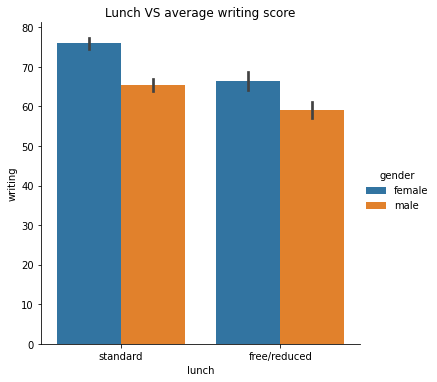

In [20]:
sns.catplot(x='lunch', y='writing', hue='gender', data=df, kind='bar').set(title='Lunch VS average writing score');

Students with standard lunch happened to have higher average writing score compare to  students with free or reduced lunch. The female students performed better than their male counterparts.

## Exploratory Data Analysis
## 3: Avarage reading scores
Average reading scores for students with/without the test preparation course

In [ ]:
#Use the groupby founction
df.groupby('test_prep_course')[['reading']].mean()

,reading
test_prep_course,
completed,73.893855
none,66.534268


## 4: Avarage scores for different parental levels
Average scores for the different parental education levels

In [ ]:
df.groupby('parent_education_level') [['math', 'reading', 'writing']].mean()
# df.groupby('parent_education_level') [['reading']].mean()

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


## 5: Visualize  the average reading scores
Visualize  the average reading scores for students with/without the test preparation course

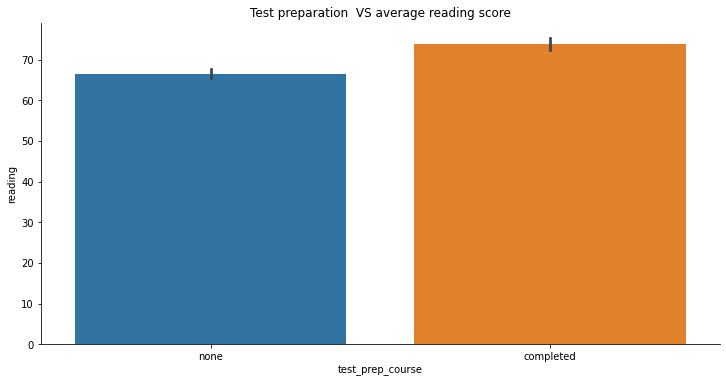

In [7]:
# #
sns.catplot(x='test_prep_course', y='reading', data=df, kind='bar', aspect=2).set(title='Test preparation  VS average reading score');



Studens who completed their test preparation course performed better than those who did not.

## 6: Visualise  the average score
Visulaise the average score with respect to parental education levels

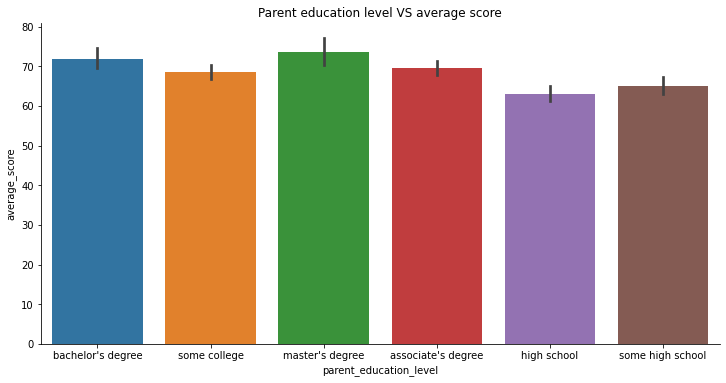

In [8]:
sns.catplot(x='parent_education_level', y='average_score', data=df, kind='bar', aspect=2).set(title='Parent education level VS average score');



It can be deduced that the higher the parent education level, the better the student performance.

## 7: Compare the average scores for students with/withoout test preparation course for different parent education levels.

In [10]:
df_1 = df.groupby(['parent_education_level', 'test_prep_course'])[['math', 'reading', 'writing']].mean()
df_1.sort_values('math', ascending = False)

math    reading    writing
parent_education_level test_prep_course                                 
bachelor's degree      completed         73.282609  76.739130  78.695652
associate's degree     completed         71.829268  76.170732  76.817073
some college           completed         71.454545  75.987013  76.519481
master's degree        completed         70.600000  78.250000  80.100000
                       none              69.307692  73.897436  73.410256
bachelor's degree      none              66.902778  70.611111  69.986111
some high school       completed         66.701299  70.948052  70.363636
associate's degree     none              65.571429  67.857143  65.842857
high school            completed         65.000000  67.839286  68.053571
some college           none              64.892617  66.087248  64.872483
some high school       none              61.078431  63.911765  60.754902
high school            none              60.992857  63.450000  60.207143

## 8: Correlations among the 3 subjects

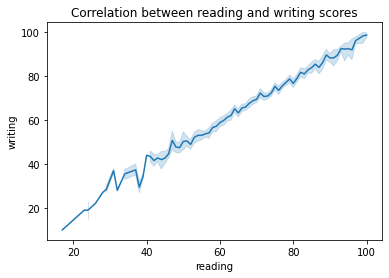

In [12]:
sns.lineplot(x = 'reading', y = 'writing', data = df).set(title='Correlation between reading and writing scores');

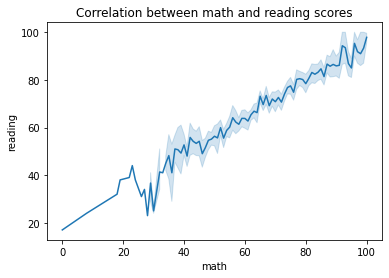

In [13]:
sns.lineplot(x = 'math', y = 'reading', data = df).set(title='Correlation between math and reading scores');

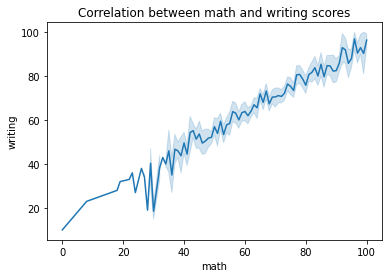

In [15]:
sns.lineplot(x = 'math', y = 'writing', data = df).set(title='Correlation between math and writing scores');

The 3 graphs above shows that scores follow a linear correlation with each othe.

In [22]:
df[df['average_score'] == 100]

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average_score
458,female,group E,bachelor's degree,standard,none,100,100,100,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.0
962,female,group E,associate's degree,standard,none,100,100,100,100.0


Only 3 students recorded 100 makrs in all the 3 subjects, among which 2 are females. The 3 of them also belong to the same race/ethnicity, group E

## KEY INSIGHTS
1: Deduction could be made that, students whose parents have higher educational level tends to perform better than their fellow counterparts with parents of lower educational level.<br>
2: Students who performs better in one subject, tends to also perform better in other subjects.<br>
3: Students who completed the test preparation course have higher marks than the ones who did not, perhaps, the test preparation have significant impact on overall student performance.<br>
4: Only three students (1 male and 2 females) recorded 100% marks in all the 3 subjects. And they all belong to the same race/ethnicity, group E. Also, out of the three students, only one student (who happened to be a male) has completed the test preparation course. They all have their lunch to be in the standard category.

## CONCLUSION 
This analysis has shown that, there are different factors responsible for student performance in exams, these factors ranging from; parental level of education, socio-economic factor, preparation for test among others. However, there are some exceptional cases where students with a low parental level of education scoring 100% marks across the 3 subjects. Similarly, some students did not completed their test preparation courses and they scored full marks in all their subjects. Perhaps, these set of students may have their own unique ways for test preparations.
Some students with Socio-economic disadvantage also appears to performed very well, perhaps these categories of students did not allow economic challenges to sabotage their efforts.<br>
Generally, there are many factors responsible for students’ performances and their level of effects differs.<br>
**NB** There are other factors that can be considered as well, but they were not captured in the dataset. These factors includes type of facilities in school, methods of teaching, access to internet, peer group, hours of study, home lesson, teacher's qualifications and many more. These factors could have significant impact on student performance.